In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [75]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')

# Imputing with KNNImputer
from sklearn.impute import KNNImputer

import plotly.graph_objs as go

from plotly.subplots import make_subplots

In [76]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/home_date_miss_values (1).csv', sep=';')
df['date'] = pd.to_datetime(df['date'])
df = df[df.date > pd.to_datetime('2022-05-30')]
df.describe()

,value
count,353.000000
mean,21839.537677
std,4040.851138
min,15470.500000
25%,18937.300000
50%,20957.000000
75%,24210.800000
max,31183.700000


In [78]:
df

,date,value
731,2022-05-31,31183.7
732,2022-06-01,29328.6
733,2022-06-02,29572.8
734,2022-06-03,29255.0
735,2022-06-04,29450.1
...,...,...
1091,2023-05-26,26338.0
1092,2023-05-27,26554.8
1093,2023-05-28,26788.7
1094,2023-05-29,27550.0


In [79]:
mean_value = df['value'].mean()
df['value'] = df['value'].fillna(mean_value)
df.describe()
# mean -9  :(

,value
count,365.000000
mean,21839.537677
std,3973.685499
min,15470.500000
25%,18985.700000
50%,21183.900000
75%,24154.400000
max,31183.700000


In [80]:
df

,date,value
731,2022-05-31,31183.7
732,2022-06-01,29328.6
733,2022-06-02,29572.8
734,2022-06-03,29255.0
735,2022-06-04,29450.1
...,...,...
1091,2023-05-26,26338.0
1092,2023-05-27,26554.8
1093,2023-05-28,26788.7
1094,2023-05-29,27550.0


In [81]:
# применение экспоненциального сглаживания с коэффициентом 0.5
# df['exp_smooth'] = df['value'].ewm(alpha=0.5, adjust=False).mean()

In [82]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f'% result[1])
print('сбалансирована' if result[1]  < 0.05 else 'не сбалансирована')
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.220487
p-value: 0.198894
не сбалансирована
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [83]:
x_data = df['date']
y_data = df['value']

fig = go.Figure(
    data=[go.Scatter(x=x_data, y=y_data)],
    layout=go.Layout(
        title='values | date',
        xaxis={'title': 'date'},
        yaxis={'title': 'value'}
    )
)
fig.show()

In [84]:
# вычисляем среднее значение исходной выборки
original_mean = df['value'].mean()
quantity = df['value'].count()
df_reset = df

# создаем новую выборку путем ресемплинга
new_data = df_reset.sample(n=quantity*2, replace=True)

# вычисляем среднее значение новой выборки
new_mean = new_data.mean()

# выводим результаты
print("Original mean:", original_mean)
print("New mean:", new_mean)

Original mean: 21839.537677053824
New mean: value    21711.188019
dtype: float64


In [57]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_reset['value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f'% result[1])
print('сбалансирована' if result[1]  < 0.05 else 'не сбалансирована')
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.220487
p-value: 0.198894
не сбалансирована
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Сбалансировать этим путем не получилось, но и RSME осталось равным ~1350

# EDA

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 731 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   value   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


In [59]:
df.describe()

,value
count,365.000000
mean,21839.537677
std,3973.685499
min,15470.500000
25%,18985.700000
50%,21183.900000
75%,24154.400000
max,31183.700000


In [60]:
df.value

731     31183.7
732     29328.6
733     29572.8
734     29255.0
735     29450.1
         ...   
1091    26338.0
1092    26554.8
1093    26788.7
1094    27550.0
1095    27559.8
Name: value, Length: 365, dtype: float64

In [61]:
# df = df.fillna(0)
df

,date,value
731,2022-05-31,31183.7
732,2022-06-01,29328.6
733,2022-06-02,29572.8
734,2022-06-03,29255.0
735,2022-06-04,29450.1
...,...,...
1091,2023-05-26,26338.0
1092,2023-05-27,26554.8
1093,2023-05-28,26788.7
1094,2023-05-29,27550.0


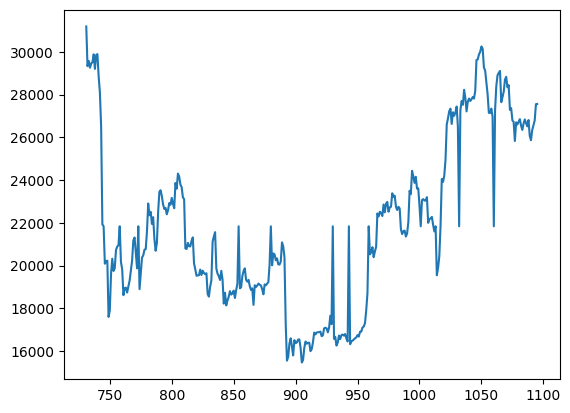

In [62]:
plt.plot(df['value'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 731 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   value   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 731 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   value   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


In [65]:
train_df = df[df.date < pd.to_datetime('2023-05-01')]
test_df = df[df.date >= pd.to_datetime('2023-05-01')]

In [66]:
train_df.shape

(335, 2)

In [67]:
test_df.shape

(30, 2)

In [68]:
# Moving Avarage
AR = AutoReg(train_df.value.values, lags=20)
AR_model = AR.fit()

In [69]:
AR_model.predict(start=len(train_df),
                 end=len(train_df) + len(test_df)-1)

array([29077.43306622, 28842.03064832, 28851.56981533, 28739.91910423,
       28627.80799531, 28196.27104649, 28118.09786155, 27287.16819918,
       28752.09229803, 28004.51446304, 27693.52615741, 28134.74467386,
       28120.48977029, 28288.4506234 , 28327.90659394, 28391.34779862,
       28326.16576417, 28278.12636509, 28178.16268153, 28249.11529181,
       28051.19387307, 28312.5102531 , 27961.80809956, 27954.65579679,
       28150.93410913, 27989.54646715, 28037.33929067, 28036.58710551,
       28028.40889104, 28022.54474526])

In [70]:
test_df['AR_model_prediction'] = AR_model.predict(start =len(train_df),
                                                  end= len(train_df) + len(test_df)-1)

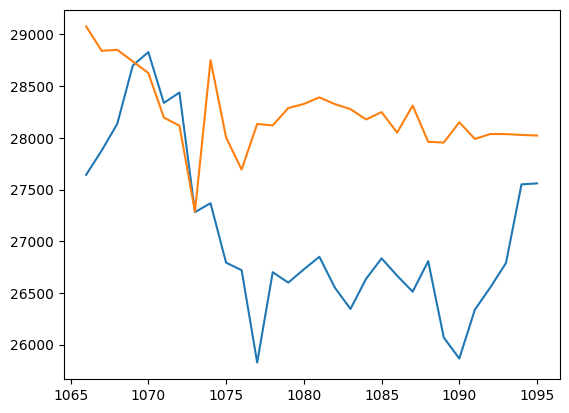

In [71]:
plt.plot(test_df[['value', 'AR_model_prediction']])

In [72]:
from sklearn.metrics import mean_absolute_error

print('MAE MA_model: ', mean_absolute_error(test_df['value'],
                                            test_df['AR_model_prediction']))


MAE MA_model:  1215.0305014136393


In [73]:
from sklearn.metrics import mean_squared_error
print('RMSE MA_model: ', mean_squared_error(test_df['value'],
                                            test_df['AR_model_prediction'])**0.5)

RMSE MA_model:  1373.4710437656288
